# MWPM Decoding using PyMatching

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import stim, pymatching as pm
import numpy as np

# 生成含噪表面码电路
circuit = stim.Circuit.generated(
    "surface_code:rotated_memory_x",
    distance=5,
    rounds=5,
    after_clifford_depolarization=0.005
)

# 提取图-like 错误模型
dem = circuit.detector_error_model(decompose_errors=True)
matching = pm.Matching.from_detector_error_model(dem)

# 采样 1000 组综合征
sampler = circuit.compile_detector_sampler()
syndrome, actual = sampler.sample(shots=1000, separate_observables=True)

# 解码并统计逻辑错误
pred = matching.decode_batch(syndrome)
errors = np.sum(np.any(pred != actual, axis=1))
print("Logical errors:", errors)   # 输出结果如 8

Logical errors: 2


In [6]:
matching

<pymatching.Matching object with 120 detectors, 0 boundary nodes, and 502 edges>

<Axes: >

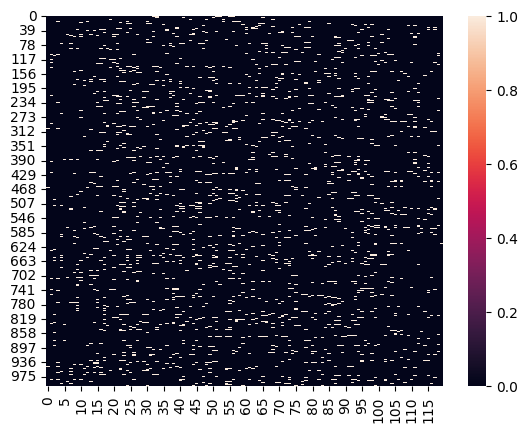

In [7]:
sns.heatmap(syndrome)

In [8]:
actual.shape, pred.shape, actual.shape

((1000, 1), (1000, 1), (1000, 1))